In [1]:
import statsrat as sr # functions for plotting, model fits etc.
from statsrat import expr # define experiments
from statsrat import rw # Rescorla-Wagner style models
from statsrat import exemplar # exemplar models
from statsrat import latent_cause # latent cause models
from statsrat import bayes_regr # Bayesian regression models

In [2]:
# Define an experiment object for a latent inhibition task **REFS**
# ** BRIEFLY EXPLAIN TASK **

# Define stage objects
iti = 5
n_rep_train = 5
n_rep_extn = 5
n_rep_test = 2
n_rep_pre_exp = 5
n_rep_no_stim = 10

test_stage = expr.stage(x_pn = [['cs']],
                        x_bg = ['ctx'],
                        y_psb = ['us'],
                        order_fixed = True,
                        iti = iti,
                        n_rep = n_rep_test)

pre_exp_stage = expr.stage(x_pn = [['cs']],
                           x_bg = ['ctx'],
                           y_psb = ['us'],
                           order_fixed = True,
                           iti = iti,
                           n_rep = n_rep_pre_exp)

training_stage = expr.stage(x_pn = [['cs']],
                            x_bg = ['ctx'],
                            y = [['us']],
                            y_psb = ['us'],
                            order_fixed = True,
                            iti = iti,
                            n_rep = n_rep_train)

# Define schedule objects
cond = expr.schedule(resp_type = 'exct', stages = {'cond': training_stage, 'test': test_stage})
pre_exp = expr.schedule(resp_type = 'exct', stages = {'pre_exposure': pre_exp_stage, 'cond': training_stage, 'test': test_stage})

# Define behavioral score object
cs_score = expr.behav_score(stage = 'test',
                            trial_pos = ['cs -> nothing'],
                            resp_pos = ['us'])

# Define the experimemt object
latent_inhib = expr.experiment(schedules = {'control': cond, 'experimental': pre_exp},
                               oats = {'latent_inhibition': expr.oat(schedule_pos = ['control'],
                                                                     schedule_neg = ['experimental'],
                                                                     behav_score_pos = cs_score,
                                                                     behav_score_neg = cs_score)
})

# Create trial sequences
control_trials = latent_inhib.make_trials(schedule = 'control')
experimental_trials = latent_inhib.make_trials(schedule = 'experimental')

In [3]:
# Define a Rescorla-Wagner style model with decreasing learning rates and positively rectified prediction **REFS**
rw_power_model = rw.model(name = 'rw_power_model',
                          pred = rw.pred.rectified,
                          fbase = rw.fbase.elem,
                          fweight = rw.fweight.none,
                          lrate = rw.lrate.power,
                          drate = rw.drate.zero,
                          aux = rw.aux.basic)

# Print information about model parameters
print(rw_power_model.pars)

            min   max  default
lrate_min   0.0   0.5      0.1
power       0.0   2.0      0.5
resp_scale  0.0  10.0      1.0


In [ ]:
# Documentation for the 

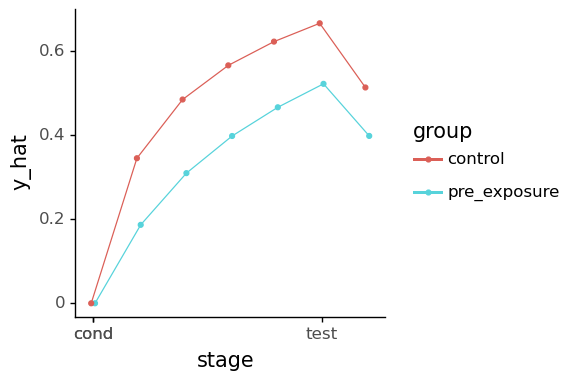

<ggplot: (8770181876200)>

In [4]:
# Run model simulations and plot results
rw_power_sim_exp = rw_power_model.simulate(experimental_trials, par_val = [0.1, 1.5, 5.0])
rw_power_sim_ctl = rw_power_model.simulate(control_trials, par_val = [0.1, 1.5, 5.0])

sr.multi_plot([rw_power_sim_exp, rw_power_sim_ctl],
               var = 'y_hat',
               only_main = True,
               draw_points = True,
               rename_coords = {'schedule': 'group'},
               rename_schedules = {'control': 'control', 'experimental': 'pre_exposure'},
               sel = [{'t': rw_power_sim_exp['stage_name'].isin(['cond', 'test'])}, {'t': rw_power_sim_ctl['stage_name'].isin(['cond', 'test'])}])

In [5]:
# Run the same simulation using a pre-defined model
# Many models of each type are pre-defined.  This is just one example.

# FINISH

In [6]:
# Define an exemplar model **REFS**
exemplar_model = exemplar.model(name = 'exemplar_model',
                                sim = exemplar.sim.Gaussian,
                                rtrv = exemplar.rtrv.normalized_sim_ex_counts,
                                atn_update = exemplar.atn_update.null,
                                y_ex_update = exemplar.y_ex_update.ex_mean)

# Print information about model parameters
print(exemplar_model.pars)

            min   max  default
decay_rate  0.0  10.0      0.5
nu          0.0  10.0      0.0
resp_scale  0.0  10.0      1.0


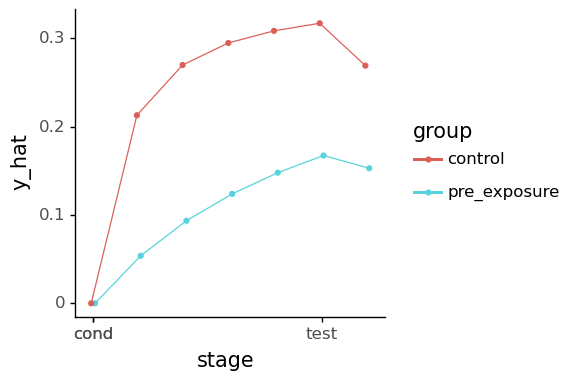

<ggplot: (8770181855449)>

In [7]:
# Run model simulations and plot results
exemplar_sim_exp = exemplar_model.simulate(experimental_trials, par_val = [1.0, 1.0, 5.0])
exemplar_sim_ctl = exemplar_model.simulate(control_trials, par_val = [1.0, 1.0, 5.0])

sr.multi_plot([exemplar_sim_exp, exemplar_sim_ctl],
               var = 'y_hat',
               only_main = True,
               draw_points = True,
               rename_coords = {'schedule': 'group'},
               rename_schedules = {'control': 'control', 'experimental': 'pre_exposure'},
               sel = [{'t': exemplar_sim_exp['stage_name'].isin(['cond', 'test'])}, {'t': exemplar_sim_ctl['stage_name'].isin(['cond', 'test'])}])

In [8]:
# Define a latent cause model **REFS**
latent_cause_model = latent_cause.model(name = 'latent_cause_model',
                                        kernel = latent_cause.kernel.constant)

# Print information about model parameters
print(latent_cause_model.pars)

               min   max  default  \
prior_tau2_x  0.01  10.0      1.0   
prior_nu_x    1.00  10.0      5.0   
prior_tau2_y  0.01  10.0      1.0   
prior_nu_y    1.00  10.0      5.0   
stick        -5.00   5.0      1.0   
alpha         0.00  15.0      1.0   
resp_scale    0.00  10.0      1.0   

                                                    description  
prior_tau2_x                 prior hyperparameter for eta for x  
prior_nu_x                   prior hyperparameter for eta for x  
prior_tau2_y                 prior hyperparameter for eta for y  
prior_nu_y                   prior hyperparameter for eta for y  
stick                                  stickiness for CRP prior  
alpha         concentration parameter; higher -> tend to inf...  
resp_scale           scales softmax/logistic response functions  


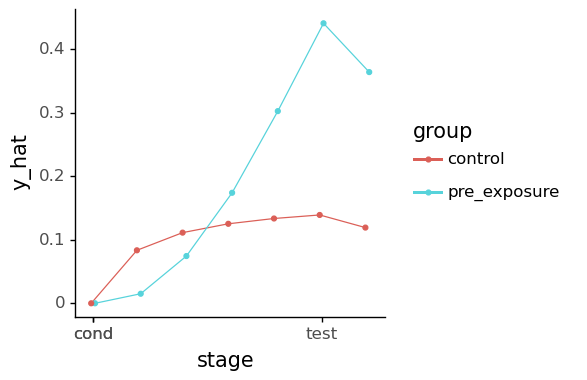

<ggplot: (8770182880919)>

In [25]:
# Run model simulations
latent_cause_sim_exp = latent_cause_model.simulate(experimental_trials, par_val = [1.0, 1.0, 1.0, 1.0, 0, 1.0, 5.0])
latent_cause_sim_ctl = latent_cause_model.simulate(control_trials, par_val = [0.1, 2.0, 0.5, 2.0, 0, 9.0, 5.0])
# FIGURE OUT PARAMETER VALUES

# Plot results
sr.multi_plot([latent_cause_sim_exp, latent_cause_sim_ctl],
               var = 'y_hat',
               only_main = True,
               draw_points = True,
               rename_coords = {'schedule': 'group'},
               rename_schedules = {'control': 'control', 'experimental': 'pre_exposure'},
               sel = [{'t': latent_cause_sim_exp['stage_name'].isin(['cond', 'test'])}, {'t': latent_cause_sim_ctl['stage_name'].isin(['cond', 'test'])}])

In [24]:
# Analyze latent cause inference
print(latent_cause_sim_exp['z'].values)
print(latent_cause_sim_ctl['z'].values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [12]:
# Define a Bayesian regression model
bayes_regr_model = bayes_regr.model(name = 'bayes_regr_model',
                                    fbase = rw.fbase.elem,
                                    link = bayes_regr.link.linear,
                                    tausq_inv_dist = bayes_regr.tausq_inv_dist.constant)

# Print information about model parameters
print(bayes_regr_model.pars)

             min    max  default
tausq_inv   0.01  100.0      1.0
y_var       0.00   10.0      0.1
resp_scale  0.00   10.0      1.0


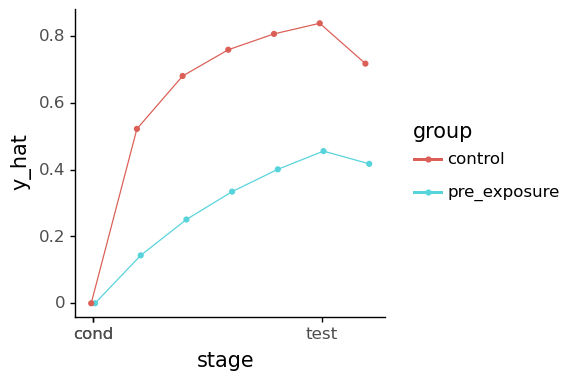

<ggplot: (8770182251135)>

In [13]:
# Run model simulations
bayes_regr_sim_exp = bayes_regr_model.simulate(experimental_trials, par_val = [1.0, 1.0, 5.0])
bayes_regr_sim_ctl = bayes_regr_model.simulate(control_trials, par_val = [1.0, 1.0, 5.0])

# Plot results
sr.multi_plot([bayes_regr_sim_exp, bayes_regr_sim_ctl],
               var = 'y_hat',
               only_main = True,
               draw_points = True,
               rename_coords = {'schedule': 'group'},
               rename_schedules = {'control': 'control', 'experimental': 'pre_exposure'},
               sel = [{'t': bayes_regr_sim_exp['stage_name'].isin(['cond', 'test'])}, {'t': bayes_regr_sim_ctl['stage_name'].isin(['cond', 'test'])}])

In [ ]:
# Perform a between subjects ordinal adequacy test (OAT)
# This will let us know whether the model's failure to produce latent inhibition
# is merely due to the particular parameter values given.

# FINISH